<a href="https://colab.research.google.com/github/gojiteji/study_ReinforcementLearning_with_JAXandNumpy/blob/main/Chapt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy() # Vのコピー
for _ in range(100):
  new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
  new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
  V = new_V.copy()
  print(V)

{'L1': 0.0, 'L2': -0.5}
{'L1': -0.22499999999999998, 'L2': -0.725}
{'L1': -0.42749999999999994, 'L2': -0.9274999999999999}
{'L1': -0.6097499999999999, 'L2': -1.10975}
{'L1': -0.7737750000000001, 'L2': -1.273775}
{'L1': -0.9213975000000002, 'L2': -1.4213975}
{'L1': -1.05425775, 'L2': -1.55425775}
{'L1': -1.1738319750000001, 'L2': -1.6738319750000001}
{'L1': -1.2814487775, 'L2': -1.7814487775}
{'L1': -1.3783038997500001, 'L2': -1.8783038997500001}
{'L1': -1.4654735097750002, 'L2': -1.965473509775}
{'L1': -1.5439261587975002, 'L2': -2.0439261587975004}
{'L1': -1.61453354291775, 'L2': -2.11453354291775}
{'L1': -1.6780801886259753, 'L2': -2.1780801886259753}
{'L1': -1.735272169763378, 'L2': -2.2352721697633777}
{'L1': -1.7867449527870403, 'L2': -2.28674495278704}
{'L1': -1.833070457508336, 'L2': -2.3330704575083363}
{'L1': -1.8747634117575025, 'L2': -2.3747634117575025}
{'L1': -1.9122870705817523, 'L2': -2.412287070581752}
{'L1': -1.9460583635235769, 'L2': -2.446058363523577}
{'L1': -1.9764

In [7]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()
cnt = 0 # 何回更新したかを記録
while True:
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    # 更新された量の最大値
    delta = abs(new_V['L1'] - V['L1'])
    delta = max(delta, abs(new_V['L2'] - V['L2']))
    V = new_V.copy()
    cnt += 1
    if delta < 0.0001:
      print(V)
      print(cnt)
      break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
76


In [47]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


class Renderer:
    def __init__(self, reward_map, goal_state, wall_state):
        self.reward_map = reward_map
        self.goal_state = goal_state
        self.wall_state = wall_state
        self.ys = len(self.reward_map)
        self.xs = len(self.reward_map[0])

        self.ax = None
        self.fig = None
        self.first_flg = True

    def set_figure(self, figsize=None):
        fig = plt.figure(figsize=figsize)
        self.ax = fig.add_subplot(111)
        ax = self.ax
        ax.clear()
        ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.set_xticks(range(self.xs))
        ax.set_yticks(range(self.ys))
        ax.set_xlim(0, self.xs)
        ax.set_ylim(0, self.ys)
        ax.grid(True)

    def render_v(self, v=None, policy=None, print_value=True):
        self.set_figure()

        ys, xs = self.ys, self.xs
        ax = self.ax

        if v is not None:
            color_list = ['red', 'white', 'green']
            cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
                'colormap_name', color_list)

            # dict -> ndarray
            v_dict = v
            v = np.zeros(self.reward_map.shape)
            for state, value in v_dict.items():
                v[state] = value

            vmax, vmin = v.max(), v.min()
            vmax = max(vmax, abs(vmin))
            vmin = -1 * vmax
            vmax = 1 if vmax < 1 else vmax
            vmin = -1 if vmin > -1 else vmin

            ax.pcolormesh(np.flipud(v), cmap=cmap, vmin=vmin, vmax=vmax)

        for y in range(ys):
            for x in range(xs):
                state = (y, x)
                r = self.reward_map[y, x]
                if r != 0 and r is not None:
                    txt = 'R ' + str(r)
                    if state == self.goal_state:
                        txt = txt + ' (GOAL)'
                    ax.text(x+.1, ys-y-0.9, txt)

                if (v is not None) and state != self.wall_state:
                    if print_value:
                        offsets = [(0.4, -0.15), (-0.15, -0.3)]
                        key = 0
                        if v.shape[0] > 7: key = 1
                        offset = offsets[key]
                        ax.text(x+offset[0], ys-y+offset[1], "{:12.2f}".format(v[y, x]))

                if policy is not None and state != self.wall_state:
                    actions = policy[state]
                    max_actions = [kv[0] for kv in actions.items() if kv[1] == max(actions.values())]

                    arrows = ["↑", "↓", "←", "→"]
                    offsets = [(0, 0.1), (0, -0.1), (-0.1, 0), (0.1, 0)]
                    for action in max_actions:
                        arrow = arrows[action]
                        offset = offsets[action]
                        if state == self.goal_state:
                            continue
                        ax.text(x+0.45+offset[0], ys-y-0.5+offset[1], arrow)

                if state == self.wall_state:
                    ax.add_patch(plt.Rectangle((x,ys-y-1), 1, 1, fc=(0.4, 0.4, 0.4, 1.)))
        plt.show()

    def render_q(self, q, show_greedy_policy=True):
        self.set_figure()

        ys, xs = self.ys, self.xs
        ax = self.ax
        action_space = [0, 1, 2, 3]

        qmax, qmin = max(q.values()), min(q.values())
        qmax = max(qmax, abs(qmin))
        qmin = -1 * qmax
        qmax = 1 if qmax < 1 else qmax
        qmin = -1 if qmin > -1 else qmin


        color_list = ['red', 'white', 'green']
        cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
            'colormap_name', color_list)

        for y in range(ys):
            for x in range(xs):
                for action in action_space:
                    state = (y, x)
                    r = self.reward_map[y, x]
                    if r != 0 and r is not None:
                        txt = 'R ' + str(r)
                        if state == self.goal_state:
                            txt = txt + ' (GOAL)'
                        ax.text(x+.05, ys-y-0.95, txt)

                    if state == self.goal_state:
                        continue

                    tx, ty = x, ys-y-1

                    action_map = {
                        0: ((0.5+tx, 0.5+ty), (tx+1, ty+1), (tx, ty+1)),
                        1: ((tx, ty), (tx+1, ty), (tx+0.5, ty+0.5)),
                        2: ((tx, ty), (tx+0.5, ty+0.5), (tx, ty+1)),
                        3: ((0.5+tx, 0.5+ty), (tx+1, ty), (tx+1, ty+1)),
                    }
                    offset_map = {
                        0: (0.1, 0.8),
                        1: (0.1, 0.1),
                        2: (-0.2, 0.4),
                        3: (0.4, 0.4),
                    }
                    if state == self.wall_state:
                        ax.add_patch(plt.Rectangle((tx, ty), 1, 1, fc=(0.4, 0.4, 0.4, 1.)))
                    elif state in self.goal_state:
                        ax.add_patch(plt.Rectangle((tx, ty), 1, 1, fc=(0., 1., 0., 1.)))
                    else:

                        tq = q[(state, action)]
                        color_scale = 0.5 + (tq / qmax) / 2  # normalize: 0.0-1.0

                        poly = plt.Polygon(action_map[action],fc=cmap(color_scale))
                        ax.add_patch(poly)

                        offset= offset_map[action]
                        ax.text(tx+offset[0], ty+offset[1], "{:12.2f}".format(tq))
        plt.show()

        if show_greedy_policy:
            policy = {}
            for y in range(self.ys):
                for x in range(self.xs):
                    state = (y, x)
                    qs = [q[state, action] for action in range(4)]  # action_size
                    max_action = np.argmax(qs)
                    probs = {0:0.0, 1:0.0, 2:0.0, 3:0.0}
                    probs[max_action] = 1
                    policy[state] = probs
            self.render_v(None, policy)

In [56]:
import numpy as np
class GridWorld:
  def __init__(self):
    self.action_space = [0, 1, 2, 3]
    self.action_meaning = {
        0: "UP",
        1: "DOWN",
        2: "LEFT",
        3: "RIGHT",
    }
    self.reward_map = np.array(
        [[0, 0, 0, 1.0],
        [0, None, 0, -1.0],
        [0, 0, 0, 0]] )
    self.goal_state = (0, 3)
    self.wall_state = (1, 1)
    self.start_state = (2, 0)
    self.agent_state = self.start_state
  @property
  def height(self):
    return len(self.reward_map)
  @property
  def width(self):
    return len(self.reward_map[0])
  @property
  def shape(self):
    return self.reward_map.shape
  def actions(self):
    return self.action_space # [0, 1, 2, 3]
  def states(self):
    for h in range(self.height):
      for w in range(self.width): yield (h, w)
  def next_state(self, state, action):
    # 1移動先の場所の計算
    action_move_map = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    move = action_move_map[action]
    next_state = (state[0] + move[0], state[1] + move[1])
    ny, nx = next_state
    # 2移動先がグリッドワールドの枠の外か、それとも移動先が壁か?
    if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:#枠の外か
      next_state = state
    elif next_state == self.wall_state:#壁か
      next_state = state
    return next_state # 3次の状態を返す
  def reward(self, state, action, next_state):
     return self.reward_map[next_state]

  def render_v(self, v=None, policy=None, print_value=True):
      renderer = Renderer(self.reward_map, self.goal_state,
                                        self.wall_state)
      renderer.render_v(v, policy, print_value)
  def render_q(self, q=None, print_value=True):
      renderer = Renderer(self.reward_map, self.goal_state,
                                        self.wall_state)
      renderer.render_q(q, print_value)

In [57]:
env = GridWorld()
# env.height() ではなく env.height として使用できる print(env.height) # 3
print(env.width) # 4
print(env.shape) # (3, 4)

4
(3, 4)


In [58]:
for action in env.actions():
  print(action)
print('===')
for state in env.states():
  print(state)

0
1
2
3
===
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


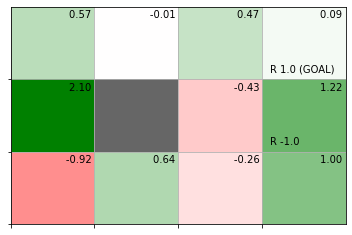

In [69]:
env = GridWorld()
V = {}
for state in env.states():
  V[state] = np.random.randn() # ダミーの状態価値関数
env.render_v(V)

In [70]:

V = {}
# ディクショナリの要素の初期化
for state in env.states():
  V[state] = 0

state = (1, 2)
print(V[state]) # 状態 (1,2) の価値関数を出力

0


In [71]:
from collections import defaultdict
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
state = (0, 1)
print(pi[state]) # {0:0.25, 1:0.25, 2:0.25, 3:0.25}

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


In [72]:
def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states():
        if state == env.goal_state:
            V[state] = 0
            continue

        action_probs = pi[state]
        new_V = 0
        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            new_V += action_prob * (r + gamma * V[next_state])
        V[state] = new_V
    return V


In [79]:
def policy_eval(pi, V, env, gamma, threshold=0.0000001):
    while True:
        old_V = V.copy()
        V = eval_onestep(pi, V, env, gamma)

        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t

        if delta < threshold:
            break
    return 

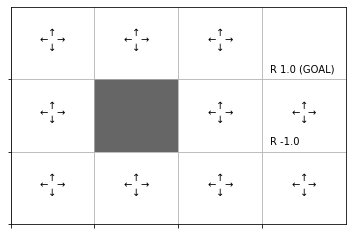

In [80]:
env = GridWorld()
gamma = 0.9
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
V = defaultdict(lambda: 0)
V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)

In [90]:
def argmax(d):
  max_value = max(d.values())
  max_key = 0
  for key, value in d.items():
    if value == max_value: max_key = key
  return max_key

In [92]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
from collections import defaultdict



def argmax(d):
    """d (dict)"""
    max_value = max(d.values())
    max_key = -1
    for key, value in d.items():
        if value == max_value:
            max_key = key
    return max_key


def greedy_policy(V, env, gamma):
    pi = {}

    for state in env.states():
        action_values = {}

        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            action_values[action] = value

        max_action = argmax(action_values)
        action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
        action_probs[max_action] = 1.0
        pi[state] = action_probs
    return pi


def policy_iter(env, gamma, threshold=0.001, is_render=True):
    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
    V = defaultdict(lambda: 0)

    while True:
        V = policy_eval(pi, V, env, gamma, threshold)
        new_pi = greedy_policy(V, env, gamma)

        if is_render:
            env.render_v(V, pi)

        if new_pi == pi:
            break
        pi = new_pi

    return pi


if __name__ == '__main__':
    env = GridWorld()
    gamma = 0.9
    pi = policy_iter(env, gamma)


TypeError: ignored